In [1]:
import numpy as np
import sympy as sp
import matplotlib
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
%matplotlib inline 
%precision 5

u'%.5f'

# Read in Mesh

In [2]:
## Read in a mesh 
meshfile = open("Pmesh_ordered.txt",'r').readlines()
n_node = int(meshfile[1])
node_X = np.zeros((n_node,2))
for i in range(n_node):
    aux = meshfile[2+i].split()
    node_X[i,0] = float(aux[0])
    node_X[i,1] = float(aux[1])
n_elem = int(meshfile[3+n_node])
elements = np.zeros((n_elem,3),dtype=int)
for i in range(n_elem):
    aux = meshfile[4+n_node+i].split()
    elements[i,0] = int(aux[0])
    elements[i,1] = int(aux[1])
    elements[i,2] = int(aux[2])

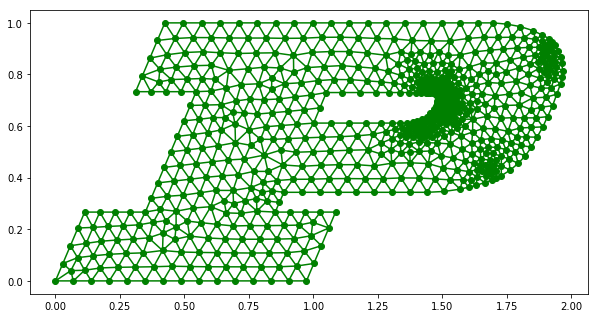

In [3]:
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
#d = np.zeros((n_node))
plt.triplot(node_X[:,0], node_X[:,1], elements-1, 'go-')

# Read in displacement solution

Displacement solution is at the nodes

In [6]:
# Read displacement solution

filesol_u = open('solution_coarse_displacement.txt','r').readlines()
n_node2  = float(filesol_u[1])
if n_node2>n_node or n_node2<n_node:
    print('something is not right, the solution file should have the same number of lines as nodes in the mesh')
d = np.zeros((n_node*2)) ## note there are x and y components but I want a single vector size n_node*2 x 1, i.e. one column
for i in range(n_node):
    aux = filesol_u[i+2].split()
    d[i*2+0] = float(aux[0]) # store x component
    d[i*2+1] = float(aux[1]) # store y component 


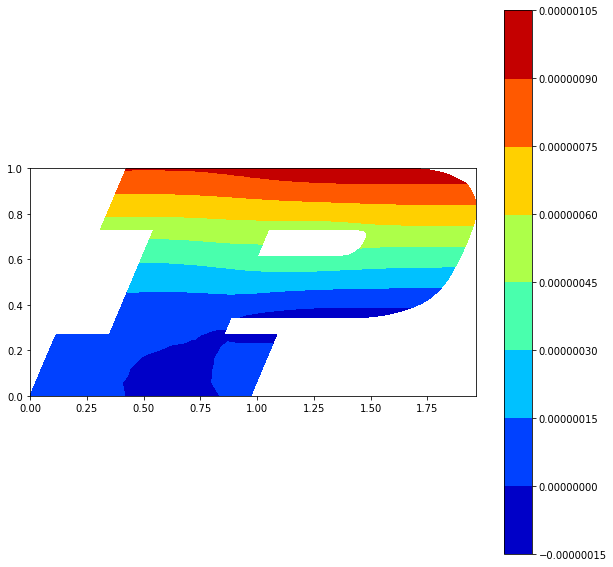

In [7]:
# Plot the x-displacement
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
plt.tricontourf(node_X[:,0],node_X[:,1] ,  elements-1, d.reshape((n_node,2))[:,0],cmap='jet')
plt.colorbar()

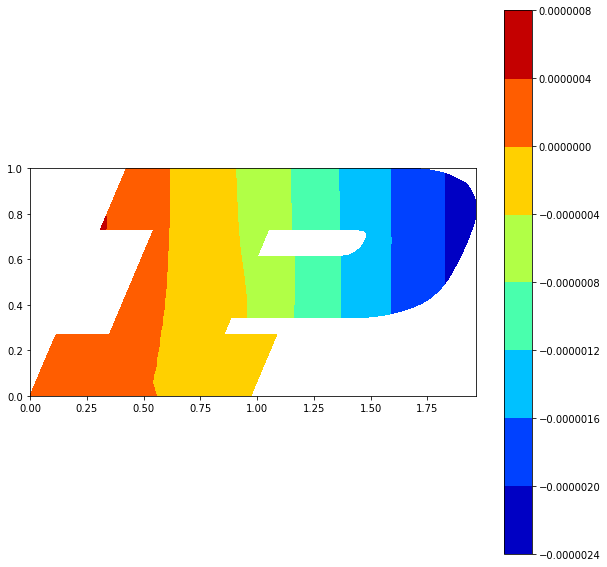

In [8]:
# Plot the y-displacement
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
plt.tricontourf(node_X[:,0],node_X[:,1] ,  elements-1, d.reshape((n_node,2))[:,1],cmap='jet')
plt.colorbar()

# Read in stress solution

Stresses are per element

In [9]:

filesol_s = open('solution_coarse_stress.txt','r').readlines()
n_elem2  = float(filesol_s[1])
if n_elem2>n_elem or n_elem2<n_elem:
    print('something is not right, the solution file should have the same number of lines as elements in the mesh')
sigma_trivec = np.zeros((n_elem,3)) # each row has [sigmax, sigmay, sigmaxy]
for i in range(n_elem):
    aux = filesol_s[i+2].split()
    sigma_trivec[i,0] = float(aux[0]) # store sigmax component
    sigma_trivec[i,1] = float(aux[1]) # store sigmay component
    sigma_trivec[i,2] = float(aux[2]) # store sigmaxy component

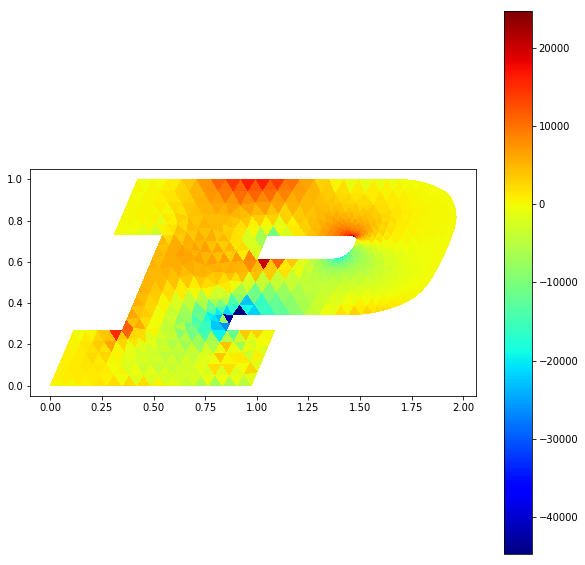

In [10]:
## Plot sigmax

plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
plt.tripcolor(node_X[:,0],node_X[:,1] ,  elements-1, facecolors=sigma_trivec[:,0] ,cmap='jet')
plt.colorbar()

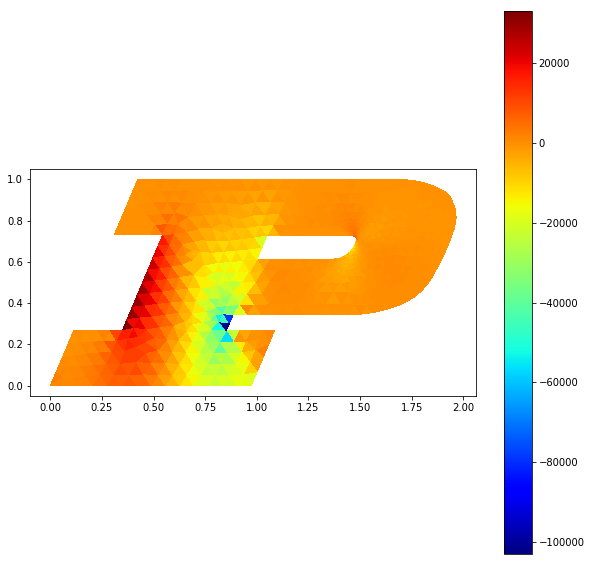

In [11]:
# Plot sigmay


plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
plt.tripcolor(node_X[:,0],node_X[:,1] ,  elements-1, facecolors=sigma_trivec[:,1] ,cmap='jet')
plt.colorbar()